<a href="https://colab.research.google.com/github/SchneiderSix/Capstone-1-Project-Zoomcamp/blob/main/wildfire_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as ks
import sklearn as sk

##Get data from kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# Read and write permission
!chmod 600 ~/.kaggle/kaggle.json

##Getting dataset from kaggle

In [6]:
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset         Customer Shopping (Latest Trends) Dataset         76KB  2024-11-23 15:26:12          19182        377  1.0              
hopesb/student-depression-dataset                           Student Depression Dataset.                      454KB  2024-11-22 17:56:03          15699        222  1.0              
oktayrdeki/houses-in-london                                 Houses in London                                  21KB  2024-12-15 19:27:42           1429         27  1.0              
mhassansaboor/intel-stock-data-1980-2024                    Intel Stock Data (1980-2024)       

In [7]:
!kaggle datasets download abdelghaniaaba/wildfire-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
License(s): other
 98% 1.42G/1.45G [00:09<00:00, 211MB/s]
100% 1.45G/1.45G [00:09<00:00, 168MB/s]


In [8]:
!unzip -q /content/wildfire-prediction-dataset -d /content/datasets

##Process images

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [10]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    '/content/datasets/train',
    target_size=(350, 350),
    batch_size=32
)

Found 30250 images belonging to 2 classes.


In [11]:
train_ds.class_indices

{'nowildfire': 0, 'wildfire': 1}

In [12]:
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    '/content/datasets/valid',
    target_size=(350, 350),
    batch_size=32,
    shuffle=False
)

Found 6300 images belonging to 2 classes.


##Define model

In [13]:
from keras.applications.xception import Xception

In [ ]:
def create_model(learning_rate=0.01):
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(350, 350, 3)
  )
  base_model.trainable = False

  inputs = ks.Input(
      shape=(350,350,3)
  )

  base = base_model(inputs, training=False)

  vectors = ks.layers.GlobalAveragePooling2D()(base)
  # 2 classes
  outputs = ks.layers.Dense(2)(vectors)

  model = ks.Model(inputs, outputs)

  optimizer = ks.optimizers.Adam(learning_rate=learning_rate)

  loss = ks.losses.CategoricalCrossentropy(
      from_logits=True
  )

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  return model

##Find best learning rate for Adam optimizer

In [ ]:
from PIL import ImageFile
# Ignore truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)
  model = create_model(lr)
  history = model.fit(
      train_ds,
      epochs=15,
      validation_data=val_ds
  )
  scores[lr] = history.history
  print('##########')

0.0001
Epoch 1/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.8512 - loss: 0.3730

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


946/946 ━━━━━━━━━━━━━━━━━━━━ 378s 393ms/step - accuracy: 0.8513 - loss: 0.3729 - val_accuracy: 0.9351 - val_loss: 0.1833
Epoch 2/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 336s 347ms/step - accuracy: 0.9361 - loss: 0.1721 - val_accuracy: 0.9451 - val_loss: 0.1530
Epoch 3/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 382s 347ms/step - accuracy: 0.9422 - loss: 0.1536 - val_accuracy: 0.9473 - val_loss: 0.1421
Epoch 4/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 329s 346ms/step - accuracy: 0.9480 - loss: 0.1409 - val_accuracy: 0.9490 - val_loss: 0.1359
Epoch 5/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 354s 373ms/step - accuracy: 0.9494 - loss: 0.1340 - val_accuracy: 0.9541 - val_loss: 0.1270
Epoch 6/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 357s 347ms/step - accuracy: 0.9514 - loss: 0.1285 - val_accuracy: 0.9554 - val_loss: 0.1203
Epoch 7/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 382s 347ms/step - accuracy: 0.9538 - loss: 0.1228 - val_accuracy: 0.9567 - val_loss: 0.1175
Epoch 8/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 328s 346ms/step - accuracy: 0.9552 - loss: 0.12

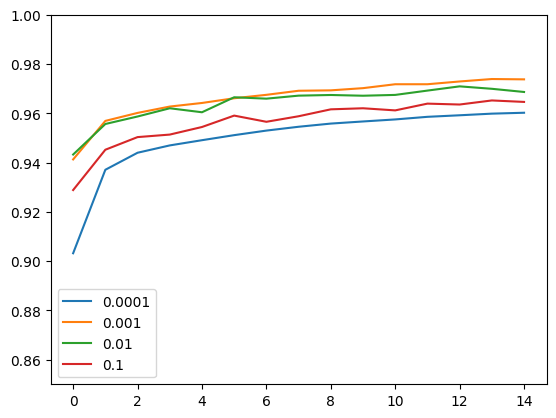

In [ ]:
for lr, hist in scores.items():
  plt.plot(
      hist['accuracy'],
      label=lr
  )

plt.ylim(0.85, 1)
plt.legend()

In [16]:
# Best lr
learning_rate = 0.001

##Adding more inner dense layers

In [ ]:
# modify create model function
def create_model(learning_rate=0.001, size_inner=100):
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(350, 350, 3)
  )
  base_model.trainable = False

  inputs = ks.Input(
      shape=(350,350,3)
  )

  base = base_model(inputs, training=False)

  vectors = ks.layers.GlobalAveragePooling2D()(base)

  # adding inner layer
  inner = ks.layers.Dense(size_inner, activation='relu')(vectors)

  # 2 classes
  outputs = ks.layers.Dense(2)(inner)

  model = ks.Model(inputs, outputs)

  optimizer = ks.optimizers.Adam(learning_rate=learning_rate)

  loss = ks.losses.CategoricalCrossentropy(
      from_logits=True
  )

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  return model

##Find the best size for inner layer

In [ ]:
from PIL import ImageFile
# Ignore truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

scores = {}

for size in [10, 100, 1000]:
  print(size)
  model = create_model(learning_rate, size_inner=size)
  history = model.fit(
      train_ds,
      epochs=15,
      validation_data=val_ds
  )
  scores[size] = history.history
  print('##########')

10
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


946/946 ━━━━━━━━━━━━━━━━━━━━ 148s 139ms/step - accuracy: 0.9317 - loss: 0.1808 - val_accuracy: 0.9613 - val_loss: 0.1028
Epoch 2/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 115s 121ms/step - accuracy: 0.9583 - loss: 0.1141 - val_accuracy: 0.9525 - val_loss: 0.1305
Epoch 3/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 114s 120ms/step - accuracy: 0.9599 - loss: 0.1003 - val_accuracy: 0.9659 - val_loss: 0.0876
Epoch 4/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 116s 122ms/step - accuracy: 0.9670 - loss: 0.0859 - val_accuracy: 0.9600 - val_loss: 0.1118
Epoch 5/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 115s 121ms/step - accuracy: 0.9718 - loss: 0.0786 - val_accuracy: 0.9602 - val_loss: 0.1092
Epoch 6/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 116s 122ms/step - accuracy: 0.9736 - loss: 0.0736 - val_accuracy: 0.9683 - val_loss: 0.0879
Epoch 7/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 116s 122ms/step - accuracy: 0.9754 - loss: 0.0660 - val_accuracy: 0.9671 - val_loss: 0.0908
Epoch 8/15
946/946 ━━━━━━━━━━━━━━━━━━━━ 117s 123ms/step - accuracy: 0.9770 - loss: 0.06

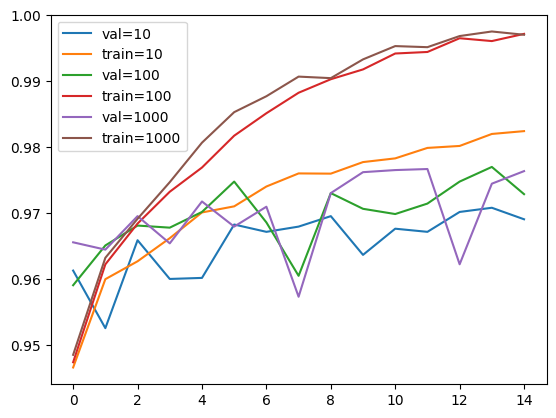

In [ ]:
for size, hist in scores.items():
  plt.plot(
      hist['val_accuracy'],
      label=('val=%s' % size),
  )
  plt.plot(
      hist['accuracy'],
      label=('train=%s' % size)
  )

  plt.legend()

In [15]:
# Best size
size_inner = 100

##Dropout and regularization

In [19]:
# modify create model function
def create_model(learning_rate=0.001, size_inner=100, drop_rate=0.5):
  base_model = Xception(
      weights='imagenet',
      include_top=False,
      input_shape=(350, 350, 3)
  )
  base_model.trainable = False

  inputs = ks.Input(
      shape=(350,350,3)
  )

  base = base_model(inputs, training=False)

  vectors = ks.layers.GlobalAveragePooling2D()(base)

  # adding inner layer
  inner = ks.layers.Dense(size_inner, activation='relu')(vectors)

  # dropout
  drop = ks.layers.Dropout(drop_rate)(inner)

  # 2 classes
  outputs = ks.layers.Dense(2)(drop)

  model = ks.Model(inputs, outputs)

  optimizer = ks.optimizers.Adam(learning_rate=learning_rate)

  loss = ks.losses.CategoricalCrossentropy(
      from_logits=True
  )

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  return model

##Find best drop rate

In [ ]:
from PIL import ImageFile
# Ignore truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

scores = {}

for drop_rate in [0.0, 0.2, 0.5, 0.8]:
  print(drop_rate)
  model = create_model(
      learning_rate,
      size_inner,
      drop_rate
      )
  history = model.fit(
      train_ds,
      epochs=30,# we need more epochs because we added regularization
      validation_data=val_ds
  )
  scores[drop_rate] = history.history
  print('##########')

NameError: name 'size' is not defined

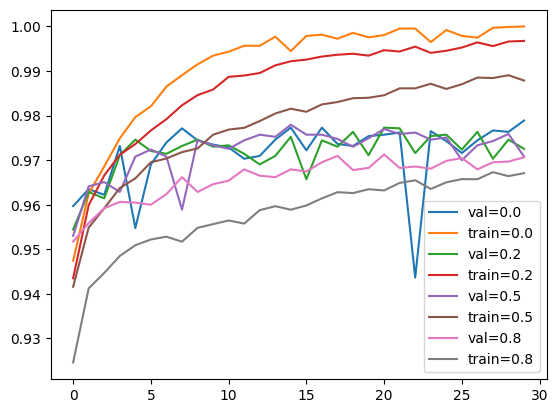

In [ ]:
for drop, hist in scores.items():
  plt.plot(
      hist['val_accuracy'],
      label=('val=%s' % drop),
  )
  plt.plot(
      hist['accuracy'],
      label=('train=%s' % drop)
  )

plt.legend()

In [14]:
drop_rate = 0.2

##Data augmentation

In [34]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    vertical_flip=True

    # I didn't use more props because the train process was 5 epochs = 1 hour... yes, amazing
    #shear_range=10,
    #rotation_range=30,
    #width_shift_range=30,
    #height_shift_range=10,
    #cval=0.0,
    #zoom_range=0.1,
)

train_ds = train_gen.flow_from_directory(
    '/content/datasets/train',
    target_size=(350, 350),
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    '/content/datasets/valid',
    target_size=(350, 350),
    batch_size=32,
    shuffle=False
)

Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


In [35]:
from PIL import ImageFile
# Ignore truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

model = create_model(
    learning_rate,
    size_inner,
    drop_rate
    )

history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds
)

Epoch 1/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 134s 134ms/step - accuracy: 0.9347 - loss: 0.1676 - val_accuracy: 0.9622 - val_loss: 0.1065
Epoch 2/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9567 - loss: 0.1144 - val_accuracy: 0.9573 - val_loss: 0.1095
Epoch 3/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9631 - loss: 0.0964 - val_accuracy: 0.9675 - val_loss: 0.0821
Epoch 4/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9638 - loss: 0.0938 - val_accuracy: 0.9670 - val_loss: 0.0847
Epoch 5/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9694 - loss: 0.0816 - val_accuracy: 0.9662 - val_loss: 0.0890
Epoch 6/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9694 - loss: 0.0764 - val_accuracy: 0.9713 - val_loss: 0.0789
Epoch 7/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9731 - loss: 0.0734 - val_accuracy: 0.9737 - val_loss: 0.0745
Epoch 8/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 124ms/step - accuracy: 0.9737 -

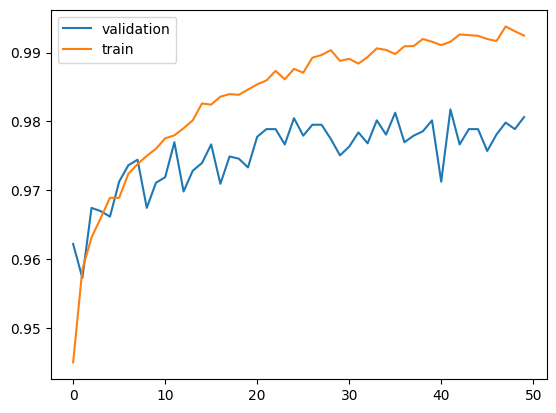

In [36]:
hist = history.history

plt.plot(hist['val_accuracy'], label='validation')

plt.plot(hist['accuracy'], label='train')

plt.legend()

##Final model

In [37]:
# Create checkpoint
checkpoint = ks.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'#max monitor variable
)

In [38]:
model = create_model(
    learning_rate,
    size_inner,
    drop_rate
)

history = model.fit(
    train_ds, epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 132s 132ms/step - accuracy: 0.9329 - loss: 0.1732 - val_accuracy: 0.9614 - val_loss: 0.1003
Epoch 2/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9578 - loss: 0.1101 - val_accuracy: 0.9575 - val_loss: 0.1125
Epoch 3/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 120s 126ms/step - accuracy: 0.9637 - loss: 0.0989 - val_accuracy: 0.9622 - val_loss: 0.1021
Epoch 4/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 120s 126ms/step - accuracy: 0.9651 - loss: 0.0924 - val_accuracy: 0.9697 - val_loss: 0.0801
Epoch 5/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 121s 127ms/step - accuracy: 0.9662 - loss: 0.0885 - val_accuracy: 0.9713 - val_loss: 0.0773
Epoch 6/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.9676 - loss: 0.0845 - val_accuracy: 0.9714 - val_loss: 0.0804
Epoch 7/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 121s 127ms/step - accuracy: 0.9729 - loss: 0.0714 - val_accuracy: 0.9716 - val_loss: 0.0777
Epoch 8/50
946/946 ━━━━━━━━━━━━━━━━━━━━ 118s 124ms/step - accuracy: 0.9718 -

##Test model

In [40]:

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    '/content/datasets/test',
    target_size=(350, 350),
    batch_size=32,
    shuffle=False
)


Found 6300 images belonging to 2 classes.


In [41]:
model = ks.models.load_model('/content/xception_v1_26_0.980.keras')

model.evaluate(test_ds)

path = '/content/datasets/test/wildfire/-59.03238,51.85132.jpg'

img = ks.preprocessing.image.load_img(path, target_size=(350, 350))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

pred = model.predict(X)

classes = [
    'nowildfire',
    'wildfire'
]

dict(zip(classes, pred[0]))

197/197 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.9873 - loss: 0.0395
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


{'nowildfire': -2.2755034, 'wildfire': 1.4563954}

##Convert model to TF-Lite

In [42]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('model.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

Saved artifact at '/tmp/tmpk6fwl5wn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 350, 350, 3), dtype=tf.float32, name='input_layer_19')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134725152036944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152080640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152082752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152043104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152045392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152044160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152089792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152092960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152088912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152092256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134725152091